### About Dataset
#### Content

**This dataset is the complete UK NHS (National Health Service) Hospital Database including geospatial data.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv("Datasets/hospital.csv")

In [5]:
df.head()

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,Surrey,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,"
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,Surrey,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,"
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,Avon,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,"
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,Greater Manchester,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,"
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,NaN,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1210
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrganisationID      1211 non-null   int64  
 1   OrganisationCode    1211 non-null   object 
 2   OrganisationType    1211 non-null   object 
 3   SubType             1211 non-null   object 
 4   Sector              1211 non-null   object 
 5   OrganisationStatus  1211 non-null   object 
 6   IsPimsManaged       1211 non-null   bool   
 7   OrganisationName    1211 non-null   object 
 8   Address1            883 non-null    object 
 9   Address2            727 non-null    object 
 10  Address3            147 non-null    object 
 11  City                1196 non-null   object 
 12  County              973 non-null    object 
 13  Postcode            1210 non-null   object 
 14  Latitude            1209 non-null   float64
 15  Longitude           1209 non-null   float64
 16  ParentODSCo

## Distribution of Hospitals by Sector

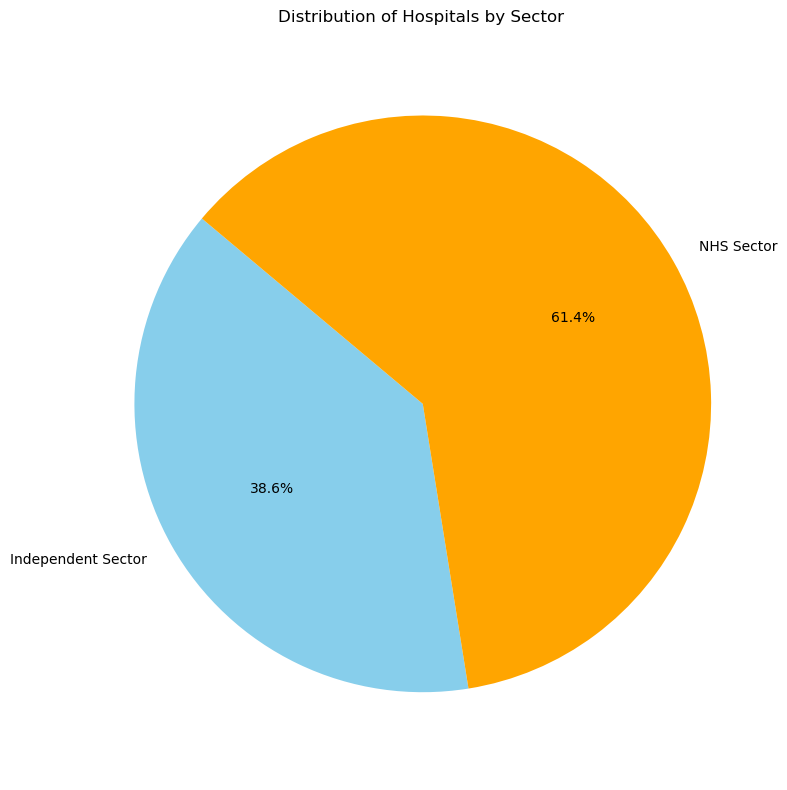

In [12]:
# Grouping the data by 'Sector' and counting the number of hospitals in each sector
sector_counts = df.groupby('Sector').size()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Hospitals by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Displaying the plot
plt.tight_layout()
plt.show()


## Managed through the Patient Information Management System (PIMS)

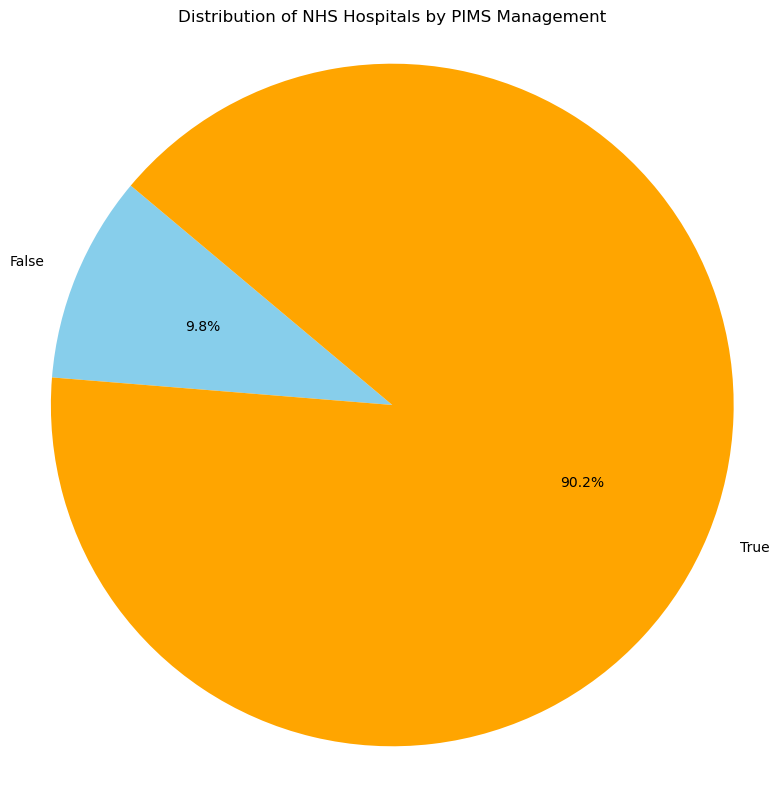

In [13]:
# Filter NHS hospitals
nhs_hospitals = df[df['Sector'] == 'NHS Sector']

# Grouping NHS hospitals by 'IsPimsManaged' and counting the number of hospitals in each category
pims_managed_counts = nhs_hospitals.groupby('IsPimsManaged').size()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pims_managed_counts, labels=pims_managed_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of NHS Hospitals by PIMS Management')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Displaying the plot
plt.tight_layout()
plt.show()


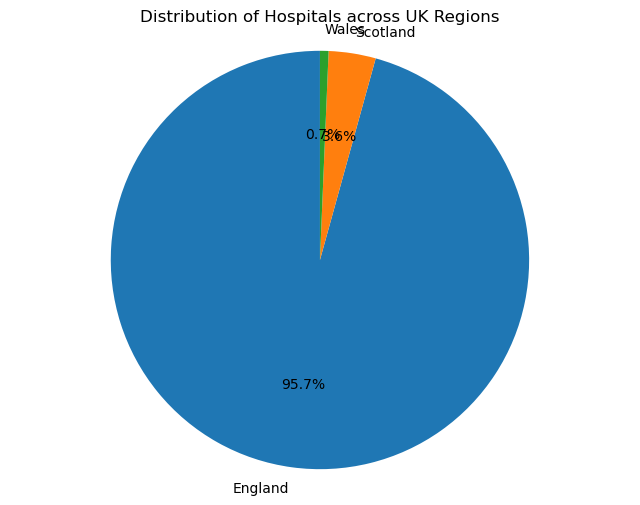

In [36]:
# Fill the missing values in the Postcode column
df['Postcode'] = df['Postcode'].ffill()
most_frequent_postcode = df['Postcode'].mode()[0]
df['Postcode'] = df['Postcode'].fillna(most_frequent_postcode)

# Create a function to extract the region based on the postcode
def get_region(postcode):
    postcode = str(postcode)
    if postcode.startswith(('BT', 'BT1', 'BT2', 'BT3', 'BT4', 'BT5', 'BT6', 'BT7', 'BT8', 'BT9')):
        return 'Northern Ireland'
    elif postcode.startswith(('AB', 'DD', 'EH', 'FK', 'G', 'IV', 'KA', 'KY', 'ML', 'PA', 'PH')):
        return 'Scotland'
    elif postcode.startswith(('LD', 'LL', 'NP', 'SA', 'SY')):
        return 'Wales'
    else:
        return 'England'

# Apply the get_region function to the Postcode column
df['Region'] = df['Postcode'].apply(get_region)

# Count the number of hospitals in each region
region_counts = df['Region'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle
plt.title('Distribution of Hospitals across UK Regions')
plt.show()

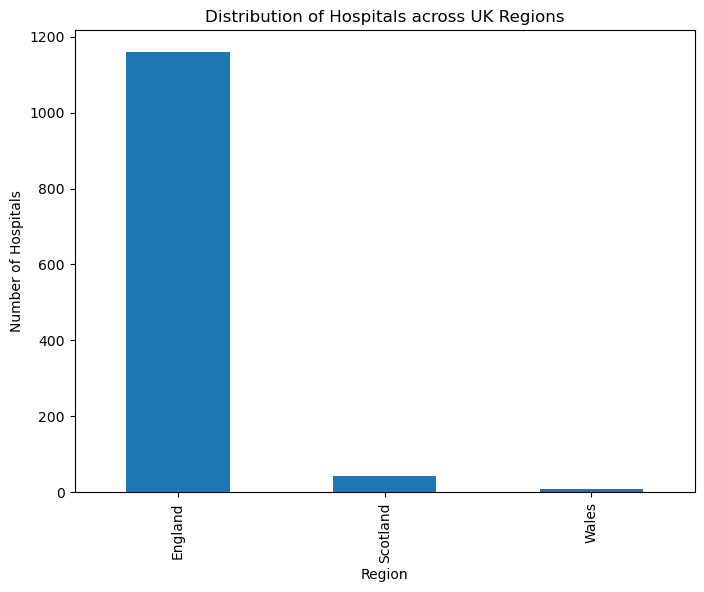

In [40]:

df['Region'] = df['Postcode'].apply(get_region)

region_counts = df['Region'].value_counts()

region_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Region')
plt.ylabel('Number of Hospitals')
plt.title('Distribution of Hospitals across UK Regions')
plt.show()

### Create a line plot

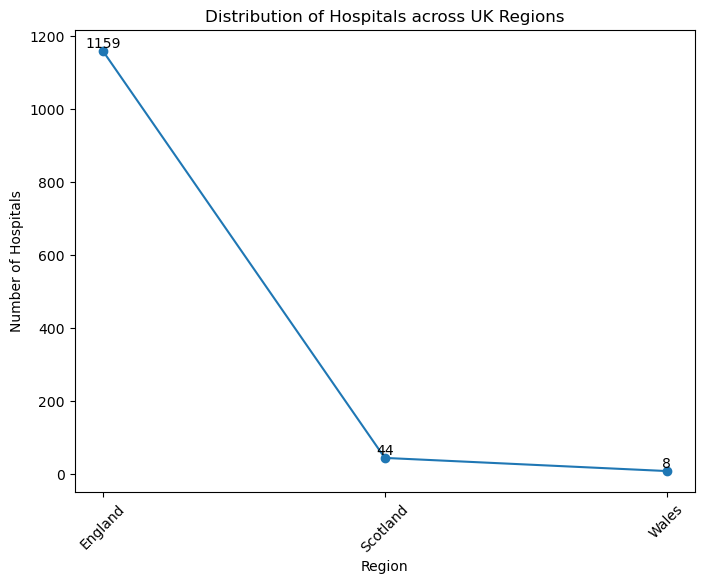

In [41]:
# Create a line plot
plt.figure(figsize=(8, 6))
regions = region_counts.index
values = region_counts.values
plt.plot(regions, values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Hospitals')
plt.title('Distribution of Hospitals across UK Regions')

# Add text labels with the exact values
for i, v in enumerate(values):
    plt.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [50]:
import folium
from folium.plugins import HeatMap

# Assuming your DataFrame is named 'df'

# Filter out hospitals with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around the UK
uk_map = folium.Map(location=[54.7024, -3.2768], zoom_start=6)

# Add markers for each hospital
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['OrganisationName'],
        icon=folium.Icon(color=type_colors.get(row['OrganisationType'], 'red'),icon_size=(10,10))
    ).add_to(uk_map)

# Display the map with hospital markers
uk_map



## Availability of Contact Information across Hospitals

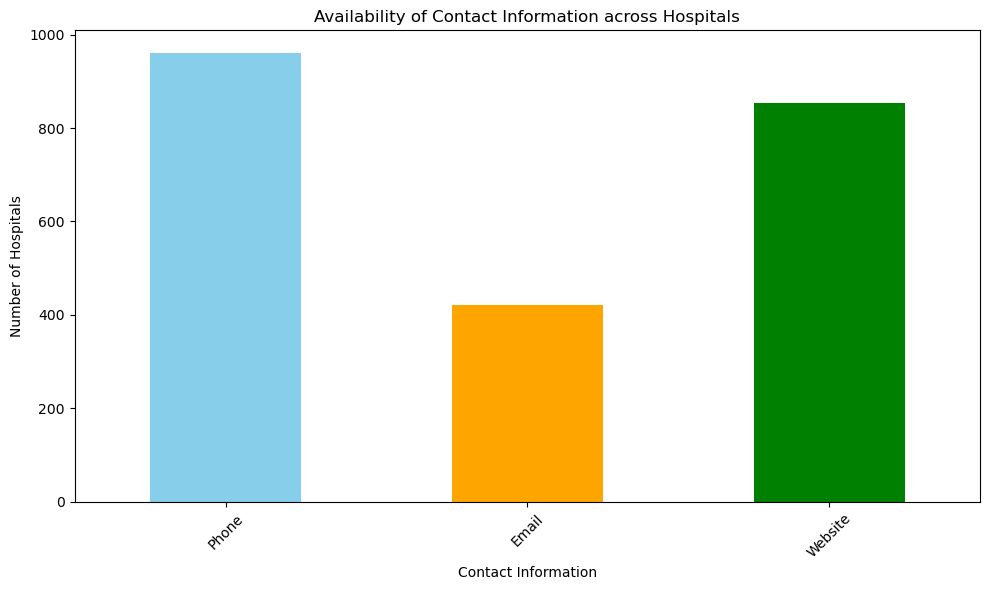

In [52]:
# Get the columns that exist in the DataFrame
existing_columns = [col for col in ['Phone', 'Email', 'Website', 'Fax'] if col in df.columns]

# Count the number of hospitals with available contact information for each category
contact_info_counts = df[existing_columns].notnull().sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
contact_info_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Availability of Contact Information across Hospitals')
plt.xlabel('Contact Information')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Text analysis on the NHS Hospitals column to identify common naming patterns or prefixes/suffixes used by different organizations or sectors.

common_prefixes = ['St.', 'St', 'Hospital', 'Health', 'Medical', 'Clinic', 'Centre', 'Community', 'Care', 'NHS']

common_suffixes = ['Hospital', 'Clinic', 'Center', 'Centre', 'Health']

In [57]:
from collections import Counter
import re

# Assuming your DataFrame is named 'df'

# Tokenize the organization names
tokens = df['OrganisationName'].str.split()

# Flatten the list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Count the frequency of each token
token_counts = Counter(all_tokens)

# Print the most common tokens
print("Most common tokens:")
print(token_counts.most_common(20))

# Define common prefixes and suffixes
common_prefixes = ['St.', 'St', 'Hospital', 'Health', 'Medical', 'Clinic', 'Centre', 'Community', 'Care', 'NHS']
common_suffixes = ['Hospital', 'Clinic', 'Center', 'Centre', 'Health']

# Find organization names containing common prefixes and suffixes
prefix_matches = [name for name in df['OrganisationName'] if any(name.startswith(prefix) for prefix in common_prefixes)]
suffix_matches = [name for name in df['OrganisationName'] if any(name.endswith(suffix) for suffix in common_suffixes)]

# Print the number of matches for common prefixes and suffixes
print("\n Number of organization names containing common prefixes:", len(prefix_matches))
print("Number of organization names containing common suffixes:", len(suffix_matches))


Most common tokens:
[('Hospital', 982), ('Community', 126), ('The', 86), ('St', 68), ('Royal', 62), ('-', 58), ('Centre', 55), ('BMI', 44), ('NHS', 44), ('and', 41), ('Trust', 39), ('Spire', 35), ('General', 34), ('Park', 31), ('Nuffield', 30), ('University', 30), ('House', 29), ('Health,', 29), ('Memorial', 29), ('Foundation', 28)]

 Number of organization names containing common prefixes: 78
## Number of organization names containing common suffixes: 883


## Relationship between Hospital Type and Sector
#### Create a contingency table

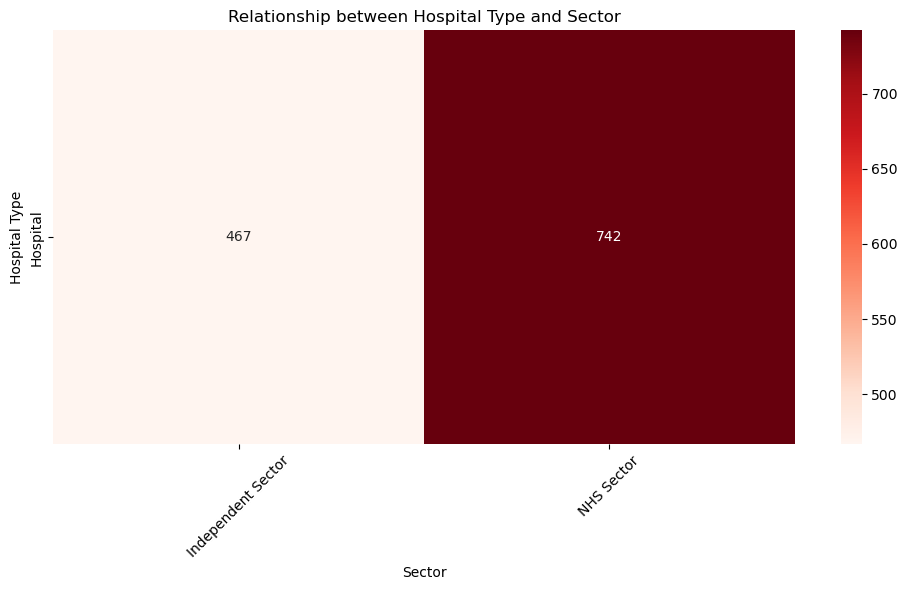

Chi-square statistic: 0.0
P-value: 1.0


In [74]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['OrganisationType'], df['Sector'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d')
plt.title('Relationship between Hospital Type and Sector')
plt.xlabel('Sector')
plt.ylabel('Hospital Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform a chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

### Geographic Location and Availability of Contact Information

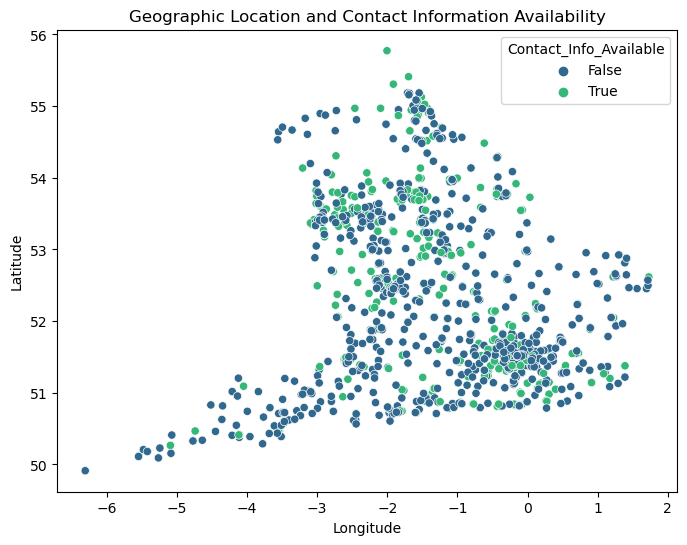

In [65]:
# Create a boolean column indicating if contact information is available
df['Contact_Info_Available'] = ~df[['Phone', 'Email', 'Website']].isna().any(axis=1)

# Create a scatter plot of latitude vs. longitude, colored by contact information availability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df,
                hue='Contact_Info_Available', palette='viridis')
plt.title('Geographic Location and Contact Information Availability')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Density of Hospitals by Geographic Location

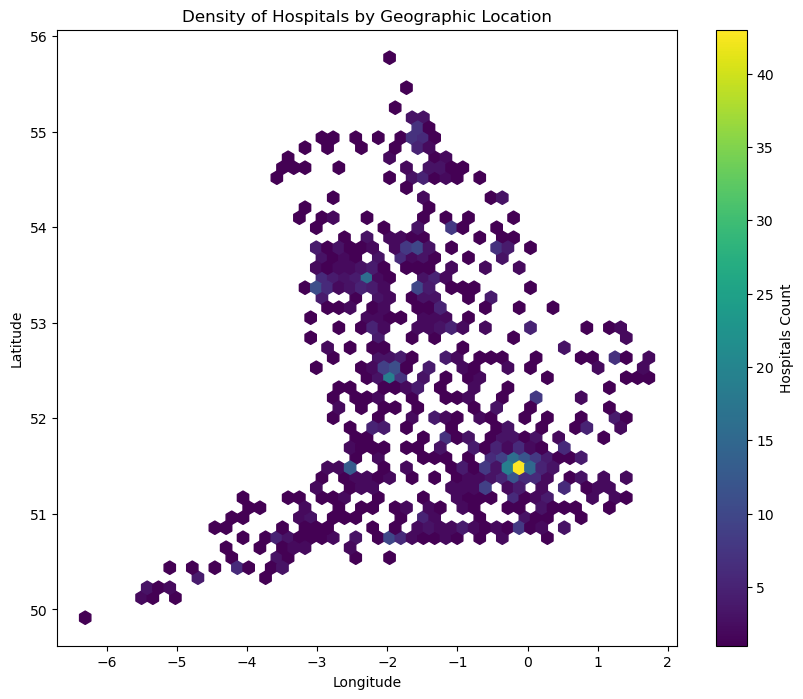

In [85]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Hospitals Count')
plt.title('Density of Hospitals by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
